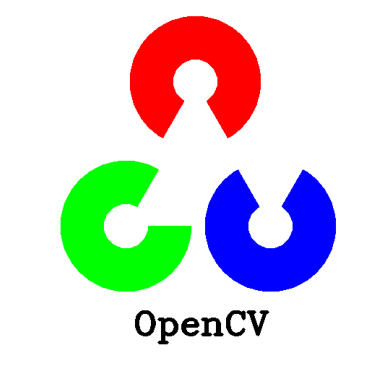

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# create white image
image = np.full((512, 512, 3), 255, dtype=np.uint8)

# red circle
cv2.ellipse(image, (256, 100), (90, 90), 120, 0, 300, (255, 0, 0), -1)
# white circle
cv2.ellipse(image, (256, 100), (30, 30), 120, 0, 300, (255, 255, 255), -1)

# green circle
cv2.ellipse(image, (160, 300), (90, 90), 0, 0, 300, (0, 255, 0), -1)
# white circle
cv2.ellipse(image, (160, 300), (30, 30), 0, 0, 300, (255, 255, 255), -1)

# blue circle
cv2.ellipse(image, (360, 300), (90, 90), 300, 0, 300, (0, 0, 255), -1)
# white circle
cv2.ellipse(image, (360, 300), (30, 30), 300, 0, 300, (255, 255, 255), -1)

cv2.putText(image, 'OpenCV', (170, 450), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 0, 0), 3)

plt.imshow(image)
plt.axis('off')
plt.show()


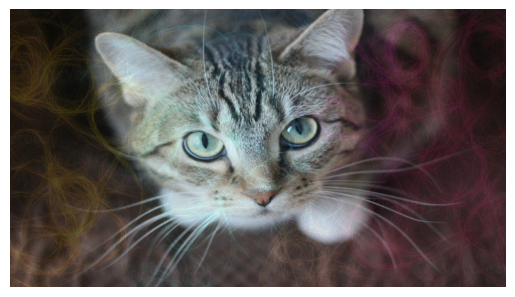

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')

if img1 is None or img2 is None:
    raise ValueError("failed to load image files!")

# Resize images to the same size if they are different
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

alpha = 0.8  # set between 0-1

# blend the images using formula: blend = (1−α)⋅img1 + α⋅img2
# convert to float32 as uint8 will overflow after 255 + 1 = 0
blend = (1 - alpha) * img1.astype(np.float32) + alpha * img2.astype(np.float32)

# convert back to uint8 and clip values to [0, 255]
blend = np.clip(blend, 0, 255).astype(np.uint8)
# Save and display the result
cv2.imwrite('manual_blend.jpg', blend)

blend = cv2.cvtColor(blend, cv2.COLOR_BGR2RGB)
plt.imshow(blend)
plt.axis('off')
plt.show()



==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        


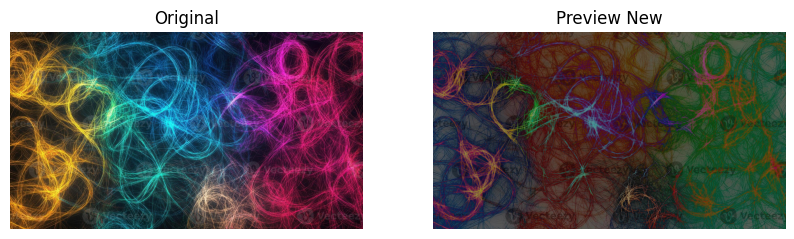


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        


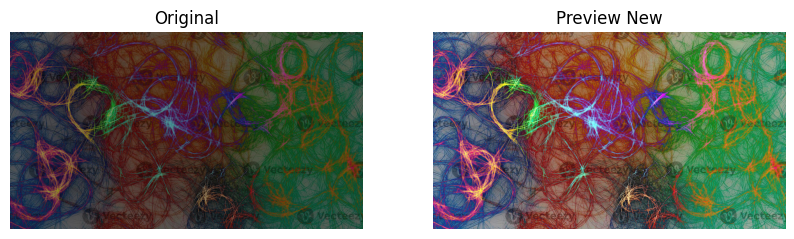


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        


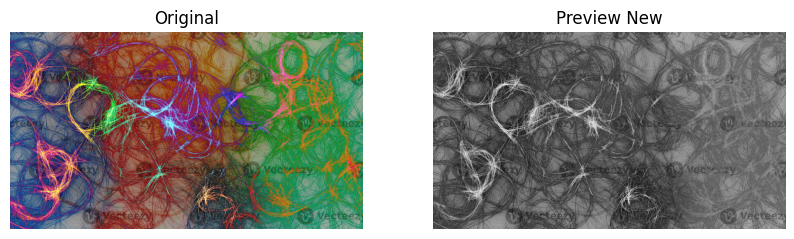


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        
Choose padding type:
1. constant
2. reflect
3. replicate
Choose aspect ratio:
1. Square
2. Rectangle
3. Custom (e.g. 4:5)
4. Padding all around (eg. 100px)


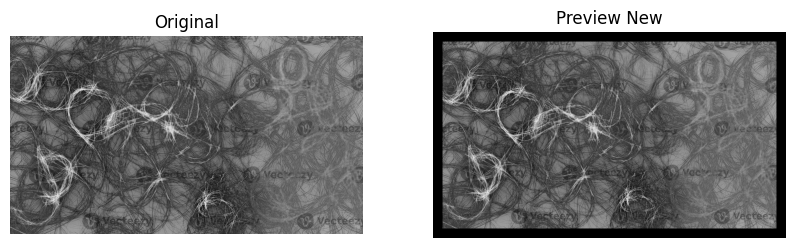


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        
Choose threshold type:
1. Binary
2. Inverse Binary


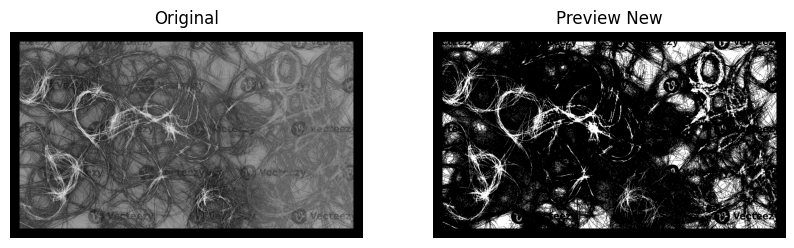


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        


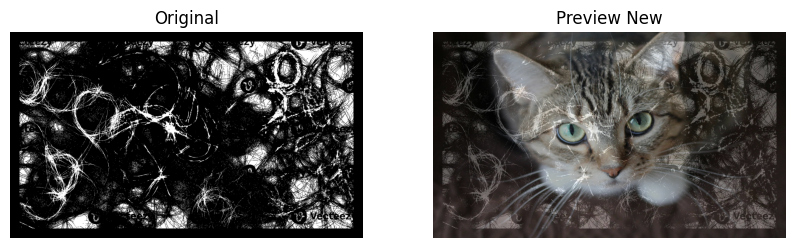


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        


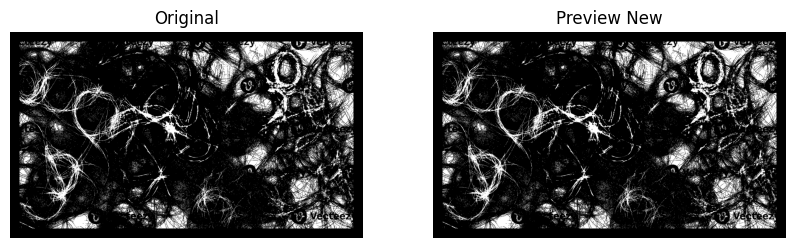


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        
=== Operation History ===
1. brightness -100
2. contrast x1.8
3. grayscale
4. padded 50px/50px with type 0
5. threshold binary
6. blended with image2.jpg alpha=0.7
7. undo

==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        
=== Operation History ===
1. brightness -100
2. contrast x1.8
3. grayscale
4. padded 50px/50px with type 0
5. threshold binary
6. blended with image2.jpg alpha=0.7
7. undo
Image saved as output.jpg
Goodbye!


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

history_stack = []
operation_log = []

# function to display original and new preview image
def show_image_side_by_side(original, edited, title="Preview New"):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[0].axis('off')
    axs[1].imshow(cv2.cvtColor(edited, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title)
    axs[1].axis('off')
    plt.show()


def adjust_brightness(image):
    value = int(input("Enter brightness adjustment (-255 to 255): "))
    result = cv2.convertScaleAbs(image, alpha=1, beta=value)
    operation_log.append(f"brightness {value}")
    return result

def adjust_contrast(image):
    alpha = float(input("Enter contrast factor (e.g. 1.2 to increase, 0.8 to decrease): "))
    result = cv2.convertScaleAbs(image, alpha=alpha, beta=0)
    operation_log.append(f"contrast x{alpha}")
    return result

def convert_to_grayscale(image):
    result = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)  # convert back to BGR for consistency
    operation_log.append("grayscale")
    return result

def add_padding(image):
    print("Choose padding type:\n1. constant\n2. reflect\n3. replicate")
    border_types = {1: cv2.BORDER_CONSTANT, 2: cv2.BORDER_REFLECT, 3: cv2.BORDER_REPLICATE}
    choice = int(input("Enter your choice: 1.constant, 2.reflect, 3.replicate "))
    border_type = border_types.get(choice, cv2.BORDER_CONSTANT)

    print("Choose aspect ratio:\n1. Square\n2. Rectangle\n3. Custom (e.g. 4:5)\n4. Padding all around (eg. 100px)")
    aspect_choice = int(input("Enter choice: 1. Square, 2. Rectangle, 3. Custom Ratio (e.g. 4:5), 4. Padding all around (e.g. 100px)"))

    h, w = image.shape[:2]

    if aspect_choice == 1:
        size = max(h, w)
        pad_vert = (size - h) // 2
        pad_horz = (size - w) // 2
    elif aspect_choice == 2:
        target_w = max(w, int(1.5 * h))
        pad_horz = (target_w - w) // 2
        pad_vert = (target_w - h) // 4
    elif aspect_choice == 3:
        ratio = input("Enter custom ratio (W:H): ").split(":")
        rw, rh = map(int, ratio)
        target_h = int(w * rh / rw)
        if target_h < h:
            target_w = int(h * rw / rh)
            pad_horz = (target_w - w) // 2
            pad_vert = (0)
        else:
            pad_vert = (target_h - h) // 2
            pad_horz = (0)
    else:
        pad_value = int(input("Enter total padding size (pixels): "))
        pad_vert = pad_value
        pad_horz = pad_value

    padded = cv2.copyMakeBorder(image, pad_vert, pad_vert, pad_horz, pad_horz, border_type, value=[0, 0, 0])
    operation_log.append(f"padded {pad_vert}px/{pad_horz}px with type {border_type}")
    return padded

def apply_threshold(image):
    print("Choose threshold type:\n1. Binary\n2. Inverse Binary")
    thresh_type = int(input("Choice: 1. Binary 2. Inverse Binary"))
    thresh_flag = cv2.THRESH_BINARY if thresh_type == 1 else cv2.THRESH_BINARY_INV
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, result = cv2.threshold(gray, 127, 255, thresh_flag)
    result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
    operation_log.append("threshold binary" if thresh_flag == cv2.THRESH_BINARY else "threshold inverse")
    return result

def blend_with_another(image):
    path = input("Enter path to second image: ")
    if not os.path.exists(path):
        print("Image not found.")
        return image
    other = cv2.imread(path)
    other = cv2.resize(other, (image.shape[1], image.shape[0]))
    alpha = float(input("Enter alpha (0.0 - 1.0): "))
    blended = ((1 - alpha) * image.astype(np.float32) + alpha * other.astype(np.float32))
    result = np.clip(blended, 0, 255).astype(np.uint8)
    operation_log.append(f"blended with {os.path.basename(path)} alpha={alpha}")
    return result

def undo_last_operation():
    if len(history_stack) < 2:
        print("Nothing to undo.")
        return history_stack[-1]
    operation_log.append("undo")
    history_stack.pop()  # remove current
    return history_stack[-1]  # revert to previous

def view_history():
    print("=== Operation History ===")
    for i, op in enumerate(operation_log, 1):
        print(f"{i}. {op}")

def main():
    image_path = input("Enter image file path: ")
    if not os.path.exists(image_path):
        print("Image file not found.")
        return
    image = cv2.imread(image_path)
    history_stack.append(image.copy())

    while True:
        print("""
==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
        """)
        choice = input("Choose an option: ")

        if choice == '1':
            new_image = adjust_brightness(history_stack[-1])
        elif choice == '2':
            new_image = adjust_contrast(history_stack[-1])
        elif choice == '3':
            new_image = convert_to_grayscale(history_stack[-1])
        elif choice == '4':
            new_image = add_padding(history_stack[-1])
        elif choice == '5':
            new_image = apply_threshold(history_stack[-1])
        elif choice == '6':
            new_image = blend_with_another(history_stack[-1])
        elif choice == '7':
            new_image = undo_last_operation()
        elif choice == '8':
            view_history()
            continue
        elif choice == '9':
            view_history()
            save = input("Save final image? (y/n): ").lower()
            if save == 'y':
                filename = input("Enter filename (e.g. output.jpg): ")
                cv2.imwrite(filename, history_stack[-1])
                print(f"Image saved as {filename}")
            print("Goodbye!")
            break
        else:
            print("Invalid option.")
            continue

        show_image_side_by_side(history_stack[-1], new_image)
        history_stack.append(new_image)

if __name__ == "__main__":
    main()
